In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


Data Manager

In [63]:
data = pd.read_excel(r'C:\Users\Mehdi\Desktop\1.xlsx')

Scaling the data

In [70]:
scaler=RobustScaler()
std_data = scaler.fit(data.loc[:,'Pb':])
std_data = scaler.transform(data.loc[:,'Pb':])
std_data = pd.DataFrame(std_data, columns = data.columns[6:27])
#standard_data_comp = pd.concat([data.loc[:,'form':'ID'], std_data], axis=1)

Pearson

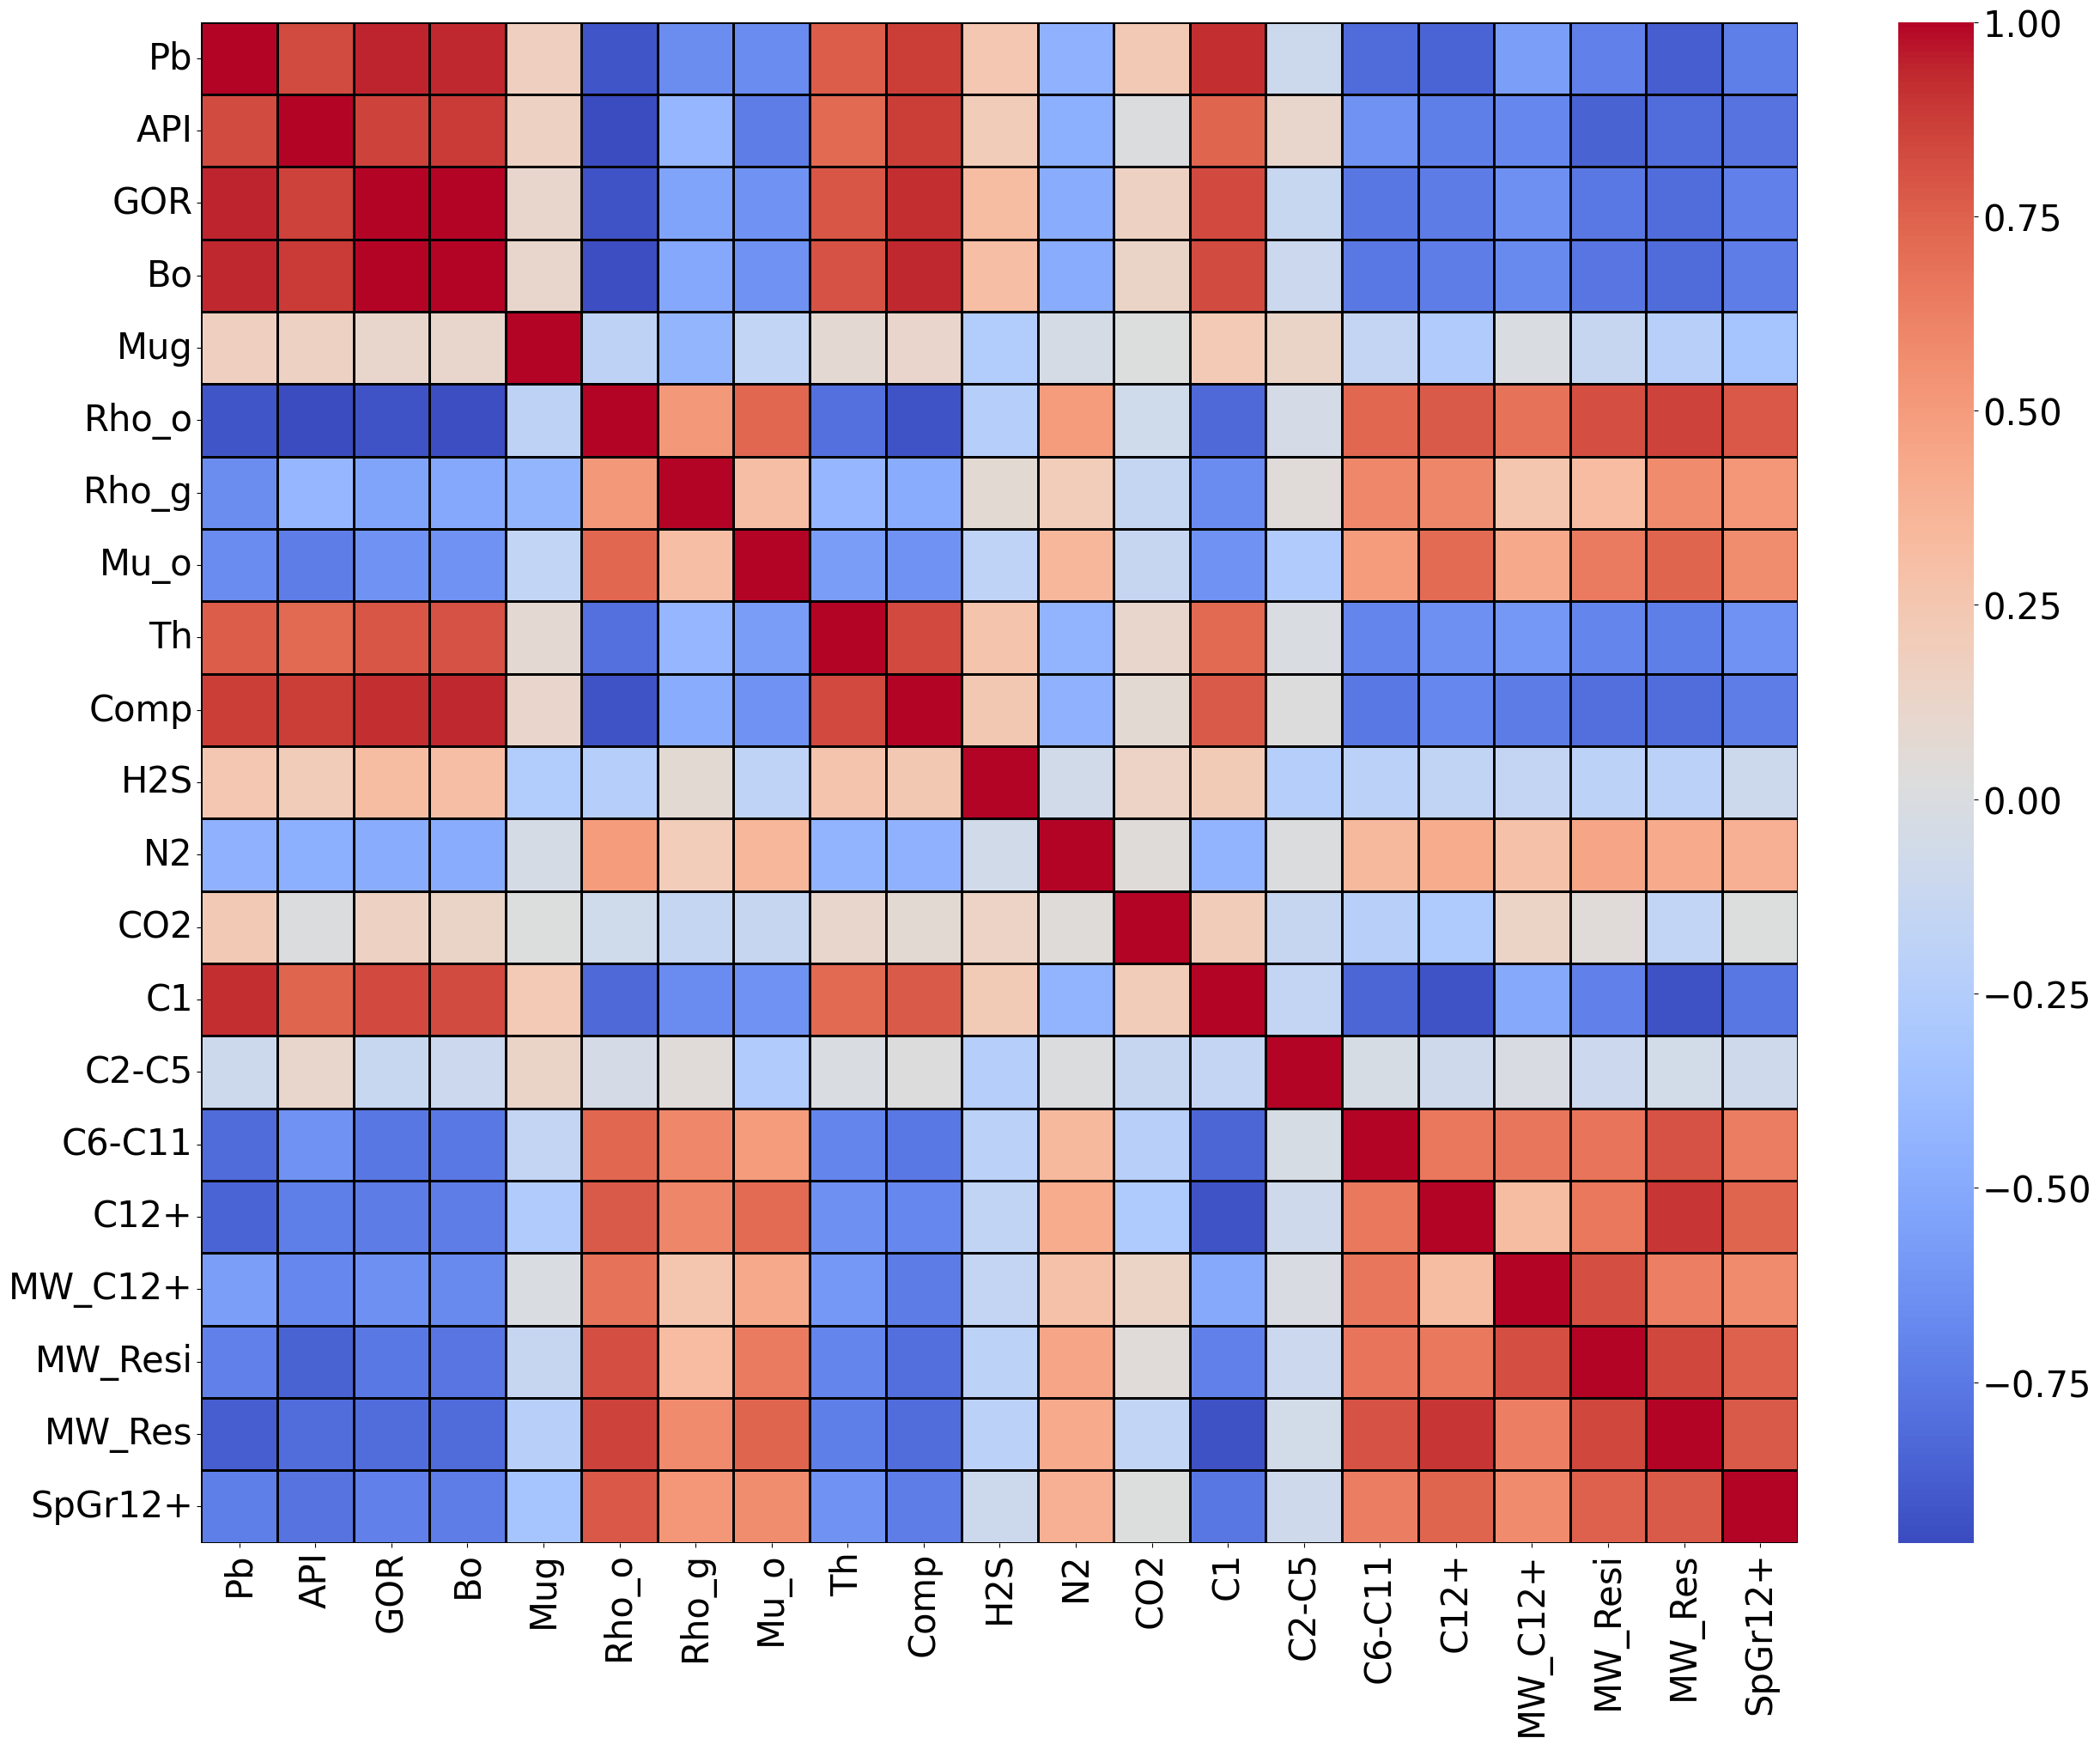

In [65]:
pearson = std_data.corr()

fig=plt.figure(figsize=(30,23))
plt.rc('xtick', labelsize = 30)
plt.rc('ytick', labelsize = 30)
sns.heatmap(std_data.corr(), cmap='coolwarm', annot=False, linewidths=2, linecolor='black')
plt.show()

Dropping some data based on what we learned from pearson

In [71]:
std_data.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)
#std_data_comp.drop(labels=['GOR','Bo', 'API', 'Comp','C12+' ,'MW_Res'],axis= 1,inplace=True)

Separation of Data based on Formation

In [8]:
FAH_C = standard_data_comp[(standard_data_comp.form == "FAH")]
ILM_C = standard_data_comp[(standard_data_comp.form == "ILM")]
SAR_C = standard_data_comp[(standard_data_comp.form == "SAR")]
GAD_C = standard_data_comp[(standard_data_comp.form == "GAD")]
KZH_C = standard_data_comp[(standard_data_comp.form == "KZH")]
ASM_C = standard_data_comp[(standard_data_comp.form == "ASM")]

FAH_CU = data_comp[(data_comp.form == "FAH")]
ILM_CU = data_comp[(data_comp.form == "ILM")]
SAR_CU = data_comp[(data_comp.form == "SAR")]
GAD_CU = data_comp[(data_comp.form == "GAD")]
KZH_CU = data_comp[(data_comp.form == "KZH")]
ASM_CU = data_comp[(data_comp.form == "ASM")]

FAH = FAH_C.loc[0:142,'Pb':]
ILM = ILM_C.loc[0:142,'Pb':]
SAR = SAR_C.loc[0:142,'Pb':]
GAD = GAD_C.loc[0:142,'Pb':]
KZH = KZH_C.loc[0:142,'Pb':]
ASM = ASM_C.loc[0:142,'Pb':]

FAH_CU_Depth = data_comp[(data_comp.form == "FAH")]
FAH_CU_Depth.loc[0:142,'Pb'] = FAH_CU_Depth.loc[0:142,'Pb']+FAH_CU_Depth.loc[0:142,'h'].apply(lambda x: (4300 - x)*-0.13)

#sns.pairplot(FAH)
#plt.show()

C:\Users\Mehdi\AppData\Local\Temp\ipykernel_5032\161877799.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FAH_CU_Depth.loc[0:142,'Pb'] = FAH_CU_Depth.loc[0:142,'Pb']+FAH_CU_Depth.loc[0:142,'h'].apply(lambda x: (4300 - x)*-0.13)


Plots based on location and depth

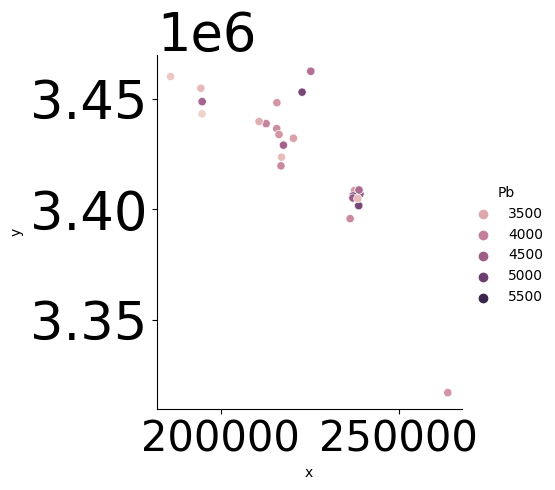

In [9]:
sns.relplot(data=FAH_CU, x="x", y="y", hue="Pb", sizes=(10, 200))
plt.show()

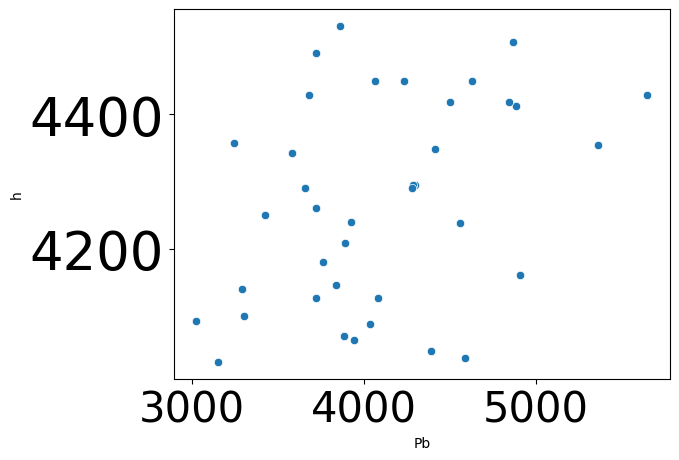

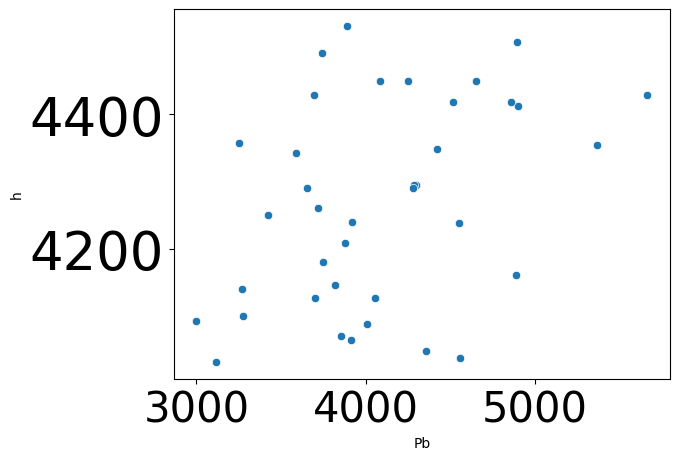

In [10]:
sns.scatterplot(data=FAH_CU, x='Pb', y="h", sizes=(10, 100))
plt.show()

sns.scatterplot(data=FAH_CU_Depth, x='Pb', y="h", sizes=(10, 100))
plt.show()

Isolation Forest


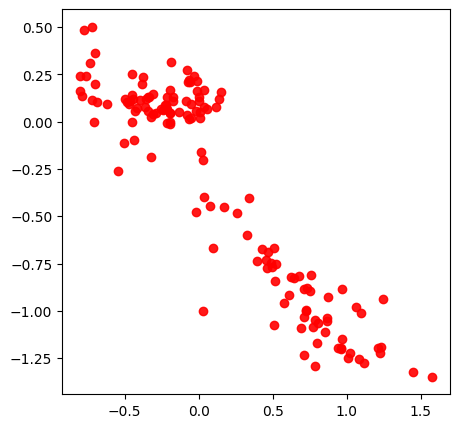

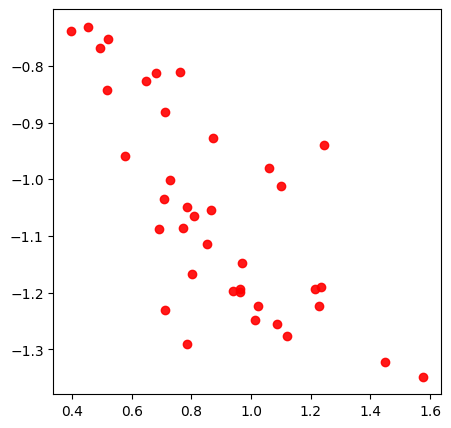

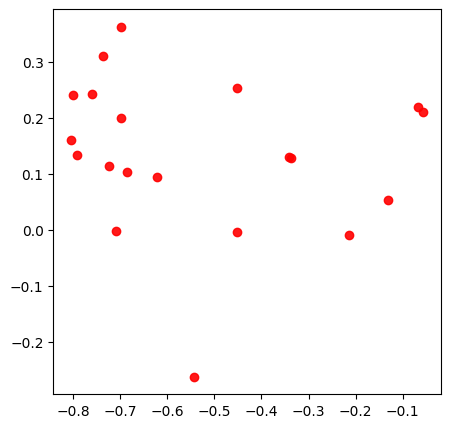

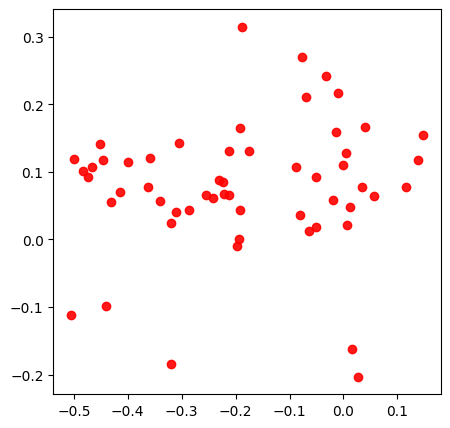

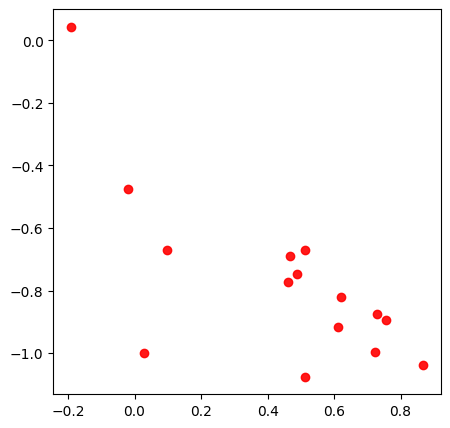

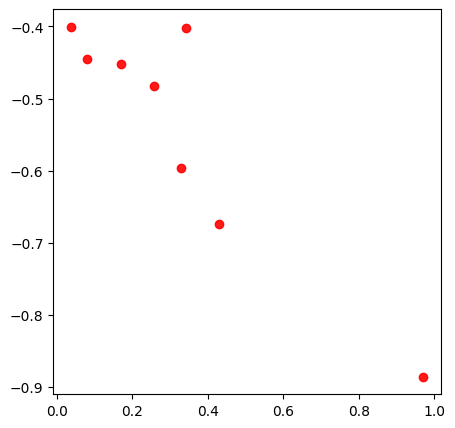

In [21]:
def IsolationForest(Data, n_est):
    from sklearn.ensemble import IsolationForest
    #Contamination is the percentage of outlier
    clf = IsolationForest(n_estimators = n_est)
    clf.fit(Data)
    Data['Scores'] = clf.decision_function(Data)
    fig=plt.figure(figsize=(5,5))
    plt.rc('xtick', labelsize = 10)
    plt.rc('ytick', labelsize = 10)
    plt.scatter(Data['Pb'], Data['Rho_o'], c='red', alpha=0.9)
    #sns.scatterplot(data=Data, x='Pb', y="Rho_o", size = 'Scores',sizes=(10, 100))
    plt.show()
    #sns.pairplot(FAH, hue = 'Scores', corner=True)
    #plt.show()
    return

COMP1 = standard_data_comp.loc[0:142,'Pb':]
FAH1 = FAH_C.loc[0:142,'Pb':]
ILM1 = ILM_C.loc[0:142,'Pb':]
SAR1 = SAR_C.loc[0:142,'Pb':]
GAD1 = GAD_C.loc[0:142,'Pb':]
KZH1 = KZH_C.loc[0:142,'Pb':]

IsolationForest(COMP1, 10)
IsolationForest(FAH1, 10)
IsolationForest(ILM1, 10)
IsolationForest(SAR1, 10)
IsolationForest(GAD1, 10)
IsolationForest(KZH1, 10)

DBSCAN

Finding optimum epsilon

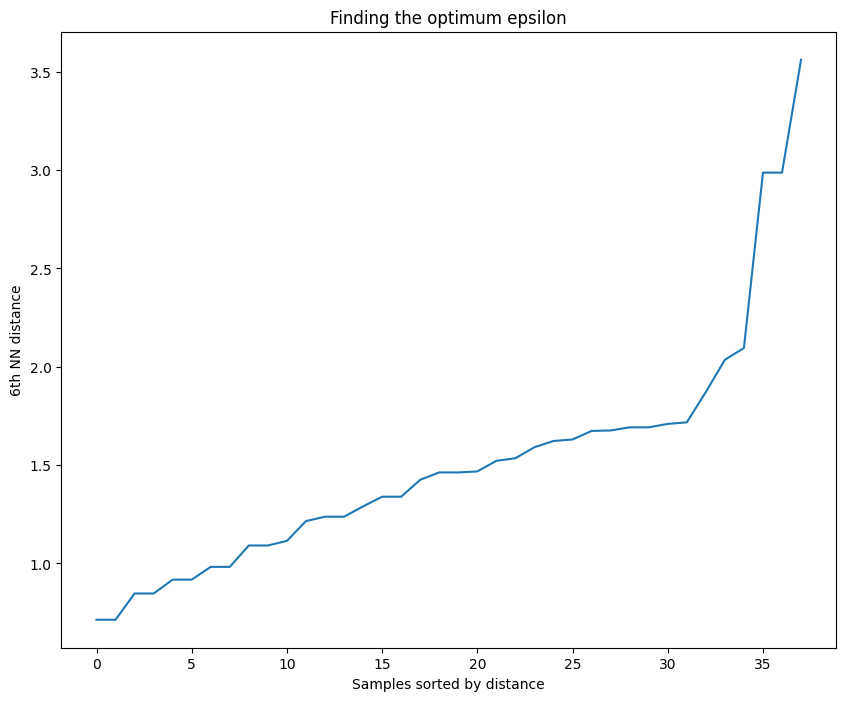

In [12]:
def OptimumEpsilonFinder (Data, n_nei):
    from sklearn.neighbors import NearestNeighbors
    Neighbors=NearestNeighbors(n_neighbors=n_nei)
    nbrs=Neighbors.fit(Data)
    distances, indices = nbrs.kneighbors(Data)
    fig=plt.figure(figsize=(10,8))
    distances=np.sort(distances, axis=0)
    distances=distances[:,1]
    plt.plot(distances)
    plt.title('Finding the optimum epsilon')
    plt.xlabel('Samples sorted by distance')
    plt.ylabel('6th NN distance')
    plt.show()
    return
OptimumEpsilonFinder (FAH, 2)

DBSCAN Itself

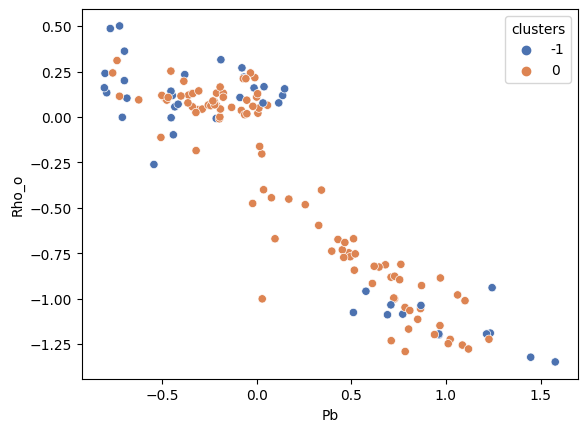

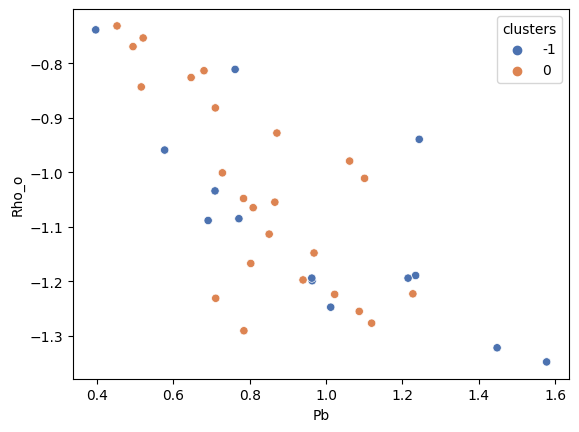

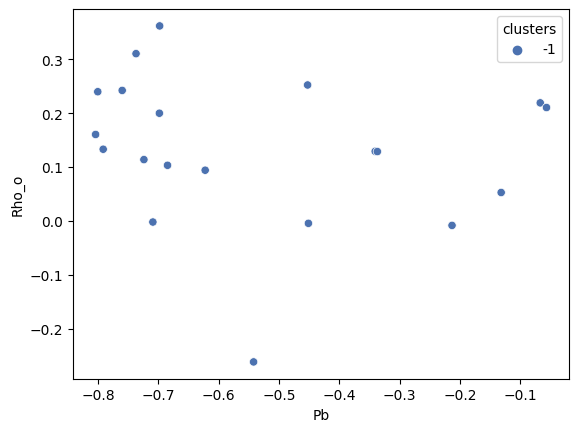

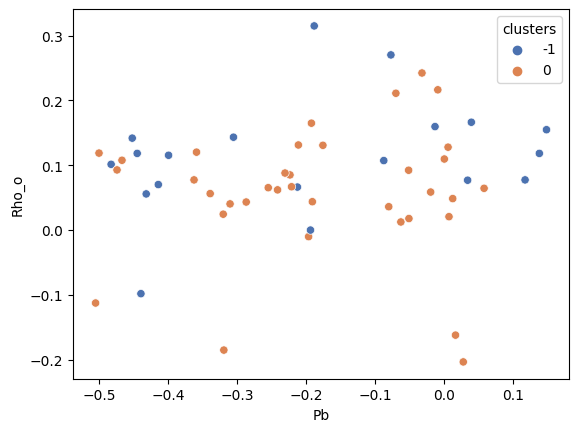

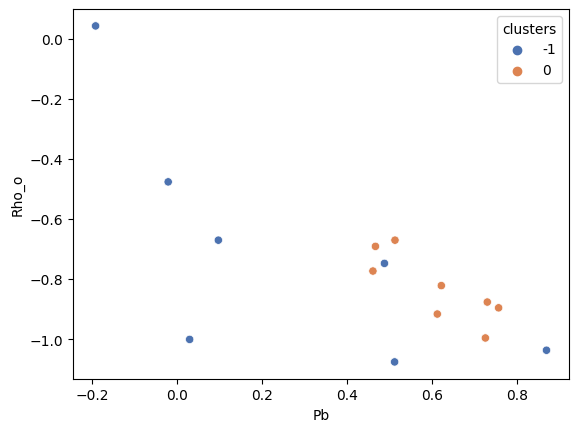

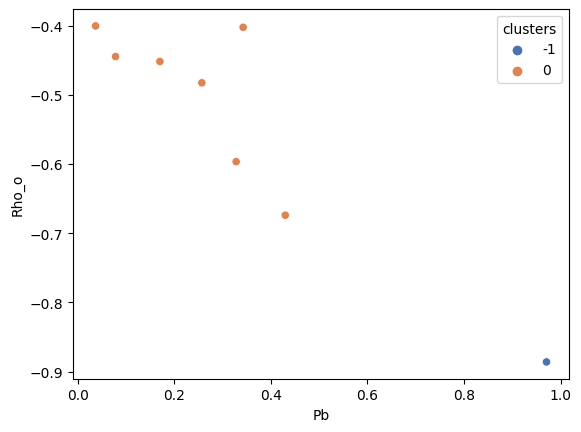

In [13]:
COMP2 = standard_data_comp.loc[0:142,'Pb':]
FAH2 = FAH_C.loc[0:142,'Pb':]
ILM2 = ILM_C.loc[0:142,'Pb':]
SAR2 = SAR_C.loc[0:142,'Pb':]
GAD2 = GAD_C.loc[0:142,'Pb':]
KZH2 = KZH_C.loc[0:142,'Pb':]

def DBSCANN(Data, eps, min_sam):
    from sklearn.cluster import DBSCAN
    Clustering=DBSCAN(eps=eps ,min_samples=min_sam, metric='euclidean')
    DB=Clustering.fit_predict(Data)
    labels=pd.DataFrame(DB,columns=['clusters'])
    #FAH=pd.DataFrame(FAH,columns=data.columns[:])
    Data['clusters']=DB
    #data['clusters']=DB
    Group_by_mean=Data.groupby(by='clusters').mean()
    #print(Group_by_mean)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", hue = 'clusters', palette="deep")
    plt.show()
    #sns.pairplot(FAH, hue = 'clusters')
    #plt.show()
    return

COMP2 = standard_data_comp.loc[0:142,'Pb':]
FAH2 = FAH_C.loc[0:142,'Pb':]
ILM2 = ILM_C.loc[0:142,'Pb':]
SAR2 = SAR_C.loc[0:142,'Pb':]
GAD2 = GAD_C.loc[0:142,'Pb':]
KZH2 = KZH_C.loc[0:142,'Pb':]

DBSCANN(COMP2, 2, 6)
DBSCANN(FAH2, 2, 6)
DBSCANN(ILM2, 2, 6)
DBSCANN(SAR2, 2, 6)
DBSCANN(GAD2, 2, 6)
DBSCANN(KZH2, 2, 6)

LOF

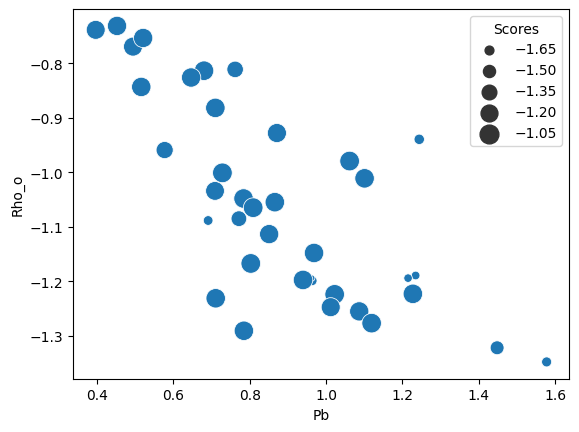

In [14]:
FAH3 = FAH_C.loc[0:142,'Pb':]
def LOF(Data, n_nei, con):
    from sklearn.neighbors import LocalOutlierFactor
    clf=LocalOutlierFactor(n_neighbors=n_nei, contamination=con,
                           metric='euclidean')
    hh= clf.fit(Data)
    Data['Scores']=clf.negative_outlier_factor_
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size = 'Scores',sizes=(20, 200))
    plt.show()
    return
LOF(FAH3, 20, 'auto')

OCSVM

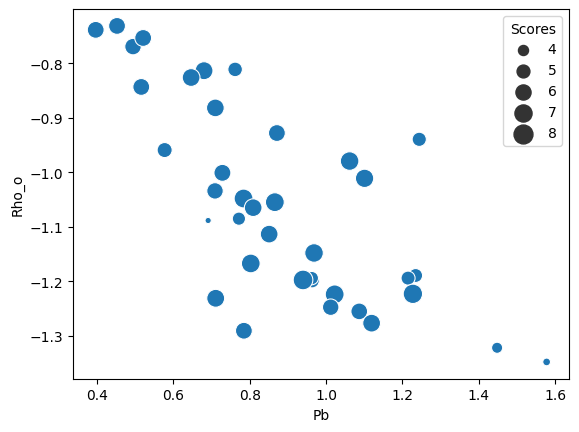

In [15]:
FAH4 = FAH_C.loc[0:142,'Pb':]
def OCSVM(Data, gamma):
    from sklearn.svm import OneClassSVM
    clf = OneClassSVM(gamma=gamma).fit(Data)
    clf.predict(Data)
    Data['Scores']=clf.score_samples(Data)
    sns.scatterplot(data=Data, x='Pb', y="Rho_o", size='Scores', sizes=(20, 200))
    plt.show()
    return
OCSVM(FAH4, 'auto')

ABOD